<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Model</div>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, cross_val_score
import warnings
warnings.simplefilter('ignore')

2024-01-03 15:54:20.518707: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-03 15:54:20.591163: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-03 15:54:20.591194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-03 15:54:20.591957: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 15:54:20.597905: I tensorflow/core/platform/cpu_feature_guar

## Read csv file

In [2]:
df = pd.read_csv('../Data/data_footballer_processed.csv', parse_dates=['Birth Date'])
df.head(10)

,Name,Height,Weight,Preferred Foot,Birth Date,Age,Nation,Club,League,Preferred Positions,...,POT,Value,Wage,Ball Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeper
0,Erling Haaland,195,94,Left,2000-07-21,23,Norway,Manchester City,England Premier League (1),ST,...,94,157000000.0,340000.0,80.5,38.0,80.2,59.0,83.7,84.0,10.4
1,Kylian Mbappé,182,75,Right,1998-12-20,24,France,Paris Saint-Germain,France Ligue 1 (1),"ST, LW",...,94,153500000.0,225000.0,92.5,33.0,76.7,78.3,89.0,82.2,8.4
2,Kevin De Bruyne,181,75,Right,1991-06-28,32,Belgium,Manchester City,England Premier League (1),"CM, CAM",...,91,103000000.0,350000.0,89.0,61.5,84.0,94.3,75.7,83.1,11.2
3,Harry Kane,188,85,Right,1993-07-28,30,England,Bayern München,Germany 1. Bundesliga (1),ST,...,90,119500000.0,170000.0,84.5,42.0,81.3,85.0,75.9,86.5,10.8
4,Thibaut Courtois,199,96,Left,1992-05-11,31,Belgium,Real Madrid,Spain Primera Division (1),GK,...,90,63000000.0,250000.0,18.0,17.0,41.5,27.3,54.0,22.4,86.6
5,Robert Lewandowski,185,81,Right,1988-08-21,35,Poland,FC Barcelona,Spain Primera Division (1),ST,...,90,58000000.0,340000.0,88.0,30.5,81.0,76.7,81.1,87.8,10.2
6,Karim Benzema,185,81,Right,1987-12-19,35,France,Al Ittihad,Saudi Pro League (1),"CF, ST",...,90,51000000.0,95000.0,89.0,21.0,77.7,80.0,79.3,84.6,8.2
7,Lionel Messi,169,67,Left,1987-06-24,36,Argentina,Inter Miami,USA Major League Soccer (1),"CF, CAM",...,90,41000000.0,23000.0,94.5,29.5,75.2,88.0,79.4,83.6,10.8
8,Rúben Dias,187,82,Right,1997-05-14,26,Portugal,Manchester City,England Premier League (1),CB,...,90,97500000.0,250000.0,69.5,89.0,73.2,71.0,70.1,48.4,9.4
9,Vini Jr.,176,73,Right,2000-07-12,23,Brazil,Real Madrid,Spain Primera Division (1),LW,...,94,121500000.0,310000.0,91.0,21.5,69.5,78.3,84.3,71.4,7.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 10020 non-null  object        
 1   Height               10020 non-null  int64         
 2   Weight               10020 non-null  int64         
 3   Preferred Foot       10020 non-null  object        
 4   Birth Date           10020 non-null  datetime64[ns]
 5   Age                  10020 non-null  int64         
 6   Nation               10020 non-null  object        
 7   Club                 10020 non-null  object        
 8   League               10020 non-null  object        
 9   Preferred Positions  10020 non-null  object        
 10  OVR                  10020 non-null  int64         
 11  POT                  10020 non-null  int64         
 12  Value                10020 non-null  float64       
 13  Wage                 10020 non-

## Model

- **We create a model to predict Value of a footballer**, there are features in dataset that influence the target variable `Value`:
  - Height
  - Weight
  - Nation
  - League
  - Preferred Positions
  - Age
  - OVR
  - POT
  - Ball Skill
  - Defence
  - Mental
  - Passing
  - Physical
  - Shooting
  - Goalkeeper
- Predicting the value of a footballer is a regression task where the goal is to estimate a continuous variable (e.g., the monetary value of the player). Different regression algorithms can be considered for this task, including **Decision Tree Regression**, **Linear Regression**, and **Random Forest Regression**.
- Here's a detailed explanation of why you might choose each of these algorithms:
  - **Decision Tree Regression**: Decision trees are versatile and can capture non-linear relationships in the data. They are useful when the relationship between features and the target is complex and non-linear.
  - **Random Forest Regression**: Random Forest is an ensemble method that builds multiple decision trees and averages their predictions. It is robust, handles complex relationships well, and is less prone to overfitting than a single decision tree.
  - **Neuron Network Regresson**: Neural networks can automatically learn relevant feature representations from the input data. This is particularly beneficial when dealing with high-dimensional and heterogeneous data sources, such as player performance metrics, historical data, and external factors like market conditions.

### Preprocessing

- Categorical variables, such as `League`, `Nation`, and `Preferred Positions`, can significantly influence the target variable `Value` in a dataset.
- In the context of a machine learning model, these categorical features often hold valuable information about the characteristics of entities like players in a sports dataset.
- To incorporate these categorical variables into a machine learning model, it's essential to encode them appropriately.
- One common method is one-hot encoding, which transforms categorical variables into a binary format, creating binary columns for each category. This encoding preserves the distinctiveness of categories while allowing the model to effectively use them as features for predicting the target variable.

In [4]:
# encode columns league and nation
one_hot_nation_league_df = pd.get_dummies(df[['League', 'Nation']])
# encode column position
position_df = df['Preferred Positions']
one_hot_position_df = position_df.str.get_dummies(', ')
# custom order from GK -> ST
custom_order = ['GK', 'LWB', 'LB', 'CB', 'RB', 'RWB', 'CDM', 'CM', 'LM', 'RM', 'CAM', 'LW', 'RW', 'CF', 'ST']
one_hot_position_df = one_hot_position_df[custom_order]
# merge encode df
one_hot_df = one_hot_nation_league_df.merge(one_hot_position_df, left_index=True, right_index=True)
one_hot_df

,League_Argentina Primera Division (1),League_Australia A-League (1),League_Austria Bundesliga (1),League_Belgium Pro League (1),League_CONMEBOL Libertadores,League_CONMEBOL Sudamericana,League_China Super League (1),League_Denmark Superliga (1),League_England Championship (2),League_England League One (3),...,RWB,CDM,CM,LM,RM,CAM,LW,RW,CF,ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10016,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
10017,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Merge one_hot with numeric columns in df

In [5]:
numeric_columns = ['Height', 'Weight', 'Age', 'OVR', 'POT', 'Ball Skills', 'Defence', 'Mental', 'Passing', 'Physical', 'Shooting', 'Goalkeeper']
numeric_df = df[numeric_columns]
encoded_df = numeric_df.merge(one_hot_df, left_index=True, right_index=True)
encoded_df

,Height,Weight,Age,OVR,POT,Ball Skills,Defence,Mental,Passing,Physical,...,RWB,CDM,CM,LM,RM,CAM,LW,RW,CF,ST
0,195,94,23,91,94,80.5,38.0,80.2,59.0,83.7,...,0,0,0,0,0,0,0,0,0,1
1,182,75,24,91,94,92.5,33.0,76.7,78.3,89.0,...,0,0,0,0,0,0,1,0,0,1
2,181,75,32,91,91,89.0,61.5,84.0,94.3,75.7,...,0,0,1,0,0,1,0,0,0,0
3,188,85,30,90,90,84.5,42.0,81.3,85.0,75.9,...,0,0,0,0,0,0,0,0,0,1
4,199,96,31,90,90,18.0,17.0,41.5,27.3,54.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,191,87,21,65,75,16.5,12.5,30.0,31.3,40.4,...,0,0,0,0,0,0,0,0,0,0
10016,177,68,20,65,81,66.0,58.0,58.7,60.7,70.7,...,1,0,0,0,0,0,0,0,0,0
10017,170,60,23,65,74,65.0,58.5,60.3,59.0,58.4,...,0,0,1,0,0,0,0,0,0,0
10018,187,77,25,65,72,48.0,67.5,55.2,52.0,63.1,...,0,0,0,0,0,0,0,0,0,0


## Data Modelling

### Split dataset for training and testing.

In [6]:
# Define X, y
X = encoded_df
y = df['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree Regression

####  Training model

- Training a Decision Tree Regression model on the `X_train` and `y_train` 

In [7]:
my_tree = DecisionTreeRegressor()
my_tree.fit(X_train, y_train)

DecisionTreeRegressor()

- Predict `X_test`, store in `y_pred`

In [8]:
y_pred = my_tree.predict(X_test)

- Excute mean square error and root mean squared error

In [9]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4170879033932.1357


In [10]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root mean Squared Error: {rmse}')

Root mean Squared Error: 2042273.0067089796


### Random Forest Regression

####  Training model

- Training a Random Forest Regression model on the `X_train` and `y_train`

In [15]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

- Predict `X_test`, store in `rf_pred`

In [16]:
rf_pred = rf_reg.predict(X_test)

- Excute mean square error and root mean squared error

In [17]:
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Mean Squared Error: {rf_mse}')

Mean Squared Error: 2879958550142.6147


In [18]:
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print(f'Root mean Squared Error: {rf_rmse}')

Root mean Squared Error: 1697044.0625224246


### Neural network Regression

####  Training model

- Scale data and build model.

In [19]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(128, input_dim=206, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model
nn_reg = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

- Training a Neural Network model on the `X_train_scaled` and `y_train`

In [20]:
nn_reg.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)
nn_pred = nn_reg.predict(X_test_scaled)
nn_pred

array([1.5915732e+03, 1.5915732e+03, 9.0109234e+04, ..., 1.5915732e+03,
       1.7809005e+06, 1.5915732e+03], dtype=float32)

- Excute mean square error and root mean squared error

In [21]:
nn_mse = mean_squared_error(y_test, nn_pred)
nn_rmse = math.sqrt(nn_mse)
print('Mean squared error: ', nn_mse)
print('Root mean Squared Error: ', nn_rmse)
# print('Mean absolute error: ', nn_mae)

Mean squared error:  38165357078503.336
Root mean Squared Error:  6177811.673926564


## Model Evaluation

### Decision Tree Regression

#### Cross-validation

In [22]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
tree_scores = cross_val_score(my_tree, X_train, y_train, scoring='neg_mean_squared_error', cv = cv)
tree_scores

array([-2.04213924e+12, -2.97463825e+12, -9.80797352e+12, -3.67793741e+12,
       -2.20777181e+12])

#### Average Mean Squared Error

In [23]:
tree_mse_scores = -tree_scores
print(f'Mean Squared Error Scores: {tree_mse_scores}')
tree_avg_mse_scores = np.mean(tree_mse_scores)
print(f'Average Mean Squared Error: {tree_avg_mse_scores}')

Mean Squared Error Scores: [2.04213924e+12 2.97463825e+12 9.80797352e+12 3.67793741e+12
 2.20777181e+12]
Average Mean Squared Error: 4142092046745.8438


#### Model Visualization

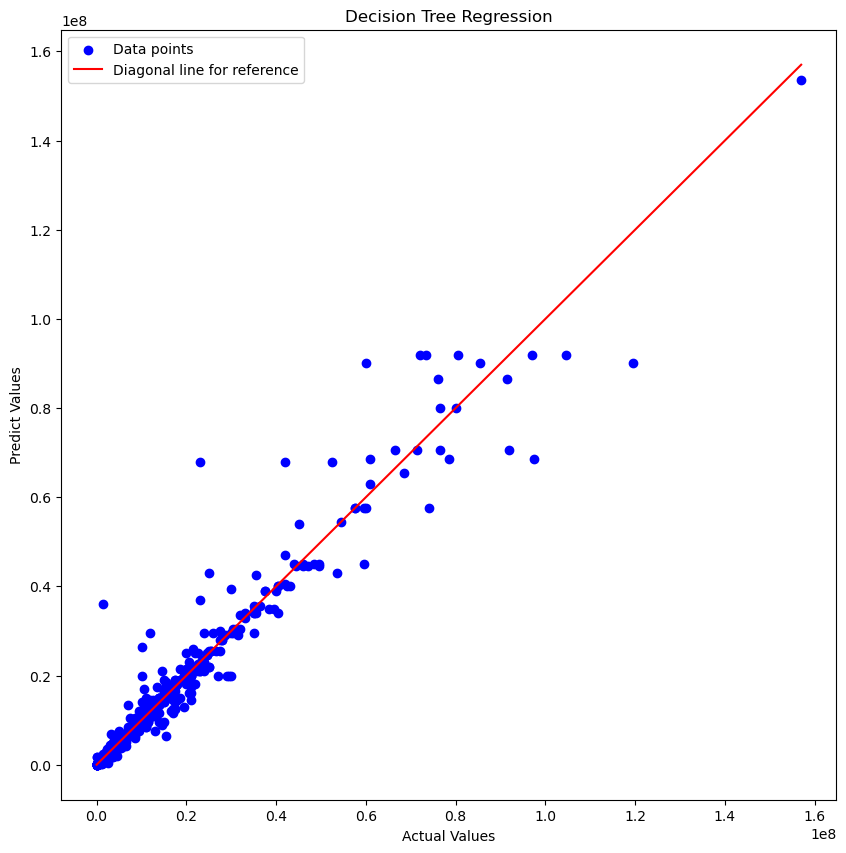

In [24]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Diagonal line for reference')
plt.plot()
plt.xlabel('Actual Values')
plt.ylabel('Predict Values')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

### Random Forest Regression

#### Cross-validation

In [25]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
rf_scores = cross_val_score(rf_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = cv)
rf_scores

array([-2.97061625e+12, -1.60344615e+12, -4.65356622e+12, -1.41838711e+12,
       -1.40314652e+12])

#### Average Mean Squared Error

In [26]:
rf_mse_scores = -rf_scores
print(f'Mean Squared Error Scores: {rf_mse_scores}')
rf_avg_mse_scores = np.mean(rf_mse_scores)
print(f'Average Mean Squared Error: {rf_avg_mse_scores}')

Mean Squared Error Scores: [2.97061625e+12 1.60344615e+12 4.65356622e+12 1.41838711e+12
 1.40314652e+12]
Average Mean Squared Error: 2409832449967.04


#### Model Visualization

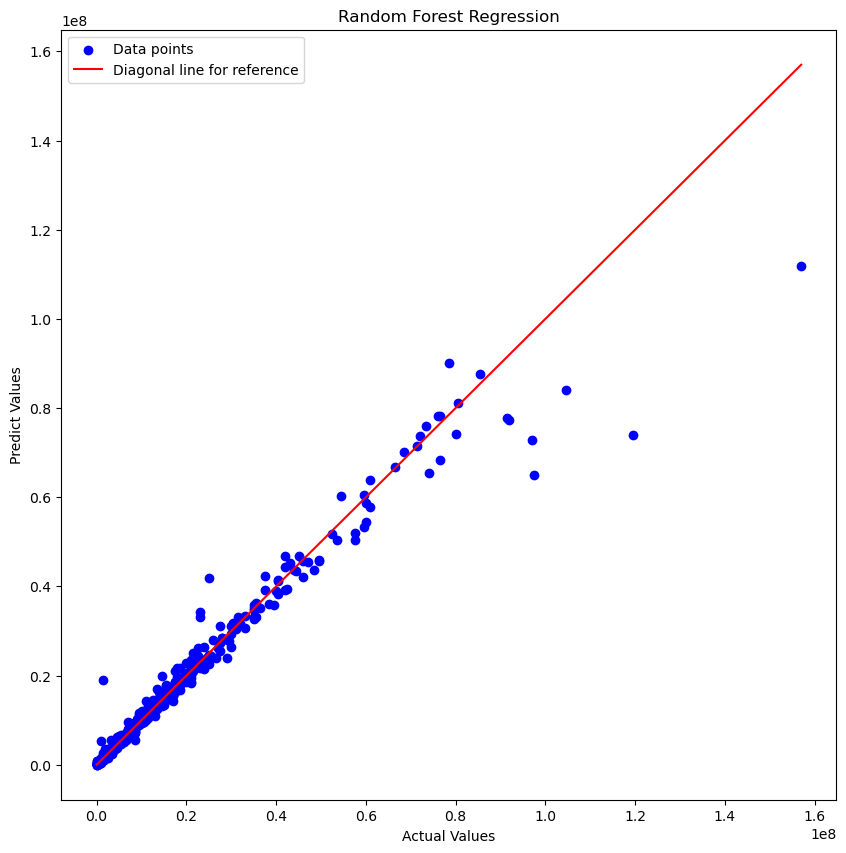

In [27]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, rf_pred, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Diagonal line for reference')
plt.xlabel('Actual Values')
plt.ylabel('Predict Values')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

### Neural network Regression

#### Cross-validation

In [28]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)
nn_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=cv)
nn_scores

array([-2.54976155e+13, -1.88898721e+13, -3.20810788e+13, -2.55954166e+13,
       -2.28076189e+13])

#### Average Mean Squared Error

In [29]:
nn_mse_scores = -nn_scores
print(f'Mean Squared Error Scores: {nn_mse_scores}')
nn_avg_mse_scores = np.mean(nn_mse_scores)
print(f'Average Mean Squared Error: {nn_avg_mse_scores}')

Mean Squared Error Scores: [2.54976155e+13 1.88898721e+13 3.20810788e+13 2.55954166e+13
 2.28076189e+13]
Average Mean Squared Error: 24974320353677.617


#### Model Visualization

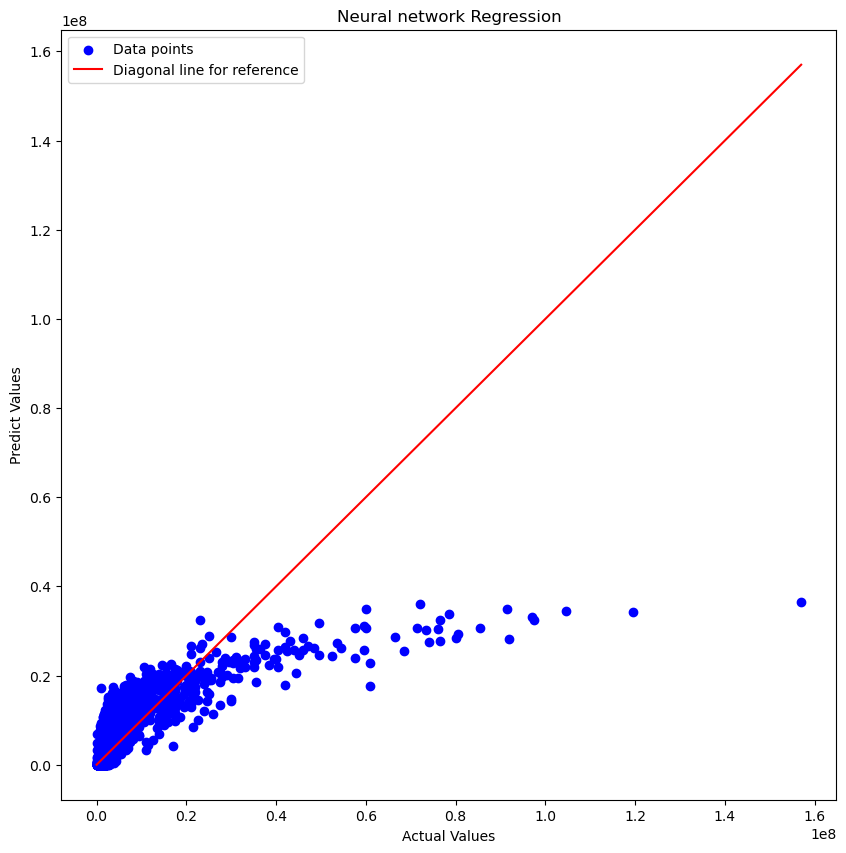

In [30]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, nn_pred, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Diagonal line for reference')
plt.xlabel('Actual Values')
plt.ylabel('Predict Values')
plt.title('Neural network Regression')
plt.legend()
plt.show()

## Model Tuning with Hyperparameters

### Find hyperparameters

**Random Forest Regression**

In [31]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [20, 30, 40],
    'max_features': [None,'log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 100],
    'n_estimators': [10, 50, 100]
}

In [32]:
grid_search_rf_reg = GridSearchCV(estimator = rf_reg, param_grid = param_grid, cv = 5, scoring='neg_mean_squared_error')

In [33]:
grid_search_rf_reg.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [20, 30, 40],
                         'max_features': [None, 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 100],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

**Decision Tree Regression**

In [34]:
param_grid = {
    'max_depth': [10, 15, 20],
    'max_features': ['log2', 'sqrt', None],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
}

In [35]:
grid_search_decision_tree_reg = GridSearchCV(estimator = my_tree, param_grid = param_grid, cv = 5,scoring='neg_mean_squared_error')

In [36]:
grid_search_decision_tree_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             scoring='neg_mean_squared_error')

**Neural Network**

In [37]:
param_grid = {
    'batch_size' : [32, 64, 128],
    'epochs' : [100, 150, 200],
    'optimizer':['adam','rmsprop'],
}

# Create GridSearchCV
grid_search_nn_reg = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search_nn_reg.fit(X_train_scaled, y_train)
print(grid_search_nn_reg.best_params_)

{'batch_size': 32, 'epochs': 150, 'optimizer': 'rmsprop'}


### Choose the best model

**Random Forest Regression**

In [38]:
print(grid_search_rf_reg.best_params_)

{'bootstrap': True, 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [39]:
rf = RandomForestRegressor(bootstrap=grid_search_rf_reg.best_params_['bootstrap'],
                           max_depth=grid_search_rf_reg.best_params_['max_depth'],
                           max_features=grid_search_rf_reg.best_params_['max_features'],
                           min_samples_leaf=grid_search_rf_reg.best_params_['min_samples_leaf'],
                           min_samples_split=grid_search_rf_reg.best_params_['min_samples_split'],
                           n_estimators=grid_search_rf_reg.best_params_['n_estimators'])
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=None, n_estimators=50)

In [40]:
rf_pred = rf.predict(X_test)

- Excute mean square error and root mean squared error

In [41]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mse

2720181018449.501

In [42]:
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_rmse

1649297.1286125192

**Decision Tree Regression**

In [43]:
print(grid_search_decision_tree_reg.best_params_)

{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [44]:
dt = DecisionTreeRegressor(max_depth=grid_search_decision_tree_reg.best_params_['max_depth'],
                           max_features=grid_search_decision_tree_reg.best_params_['max_features'],
                           min_samples_leaf=grid_search_decision_tree_reg.best_params_['min_samples_leaf'],
                           min_samples_split=grid_search_decision_tree_reg.best_params_['min_samples_split'])
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=2)

In [45]:
dt_pred = dt.predict(X_test)

- Excute mean square error and root mean squared error

In [46]:
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mse

4524125687939.757

In [47]:
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
dt_rmse

2126999.221424342

**Neural Network**

In [48]:
nn = KerasRegressor(build_fn=create_model,
                    epochs=grid_search_nn_reg.best_params_['epochs'],
                    batch_size=grid_search_nn_reg.best_params_['batch_size'],
                    verbose=0)
nn.fit(X_train_scaled, y_train)
nn_pred = nn.predict(X_test_scaled)
nn_rmse = mean_squared_error(y_test, nn_pred, squared=False)
print(nn_rmse)

5108365.146940042


In [49]:
nn_mse = mean_squared_error(y_test, nn_pred)
nn_mse

26095394474471.76

In [50]:
nn_rmse = mean_squared_error(y_test, nn_pred, squared=False)
nn_rmse

5108365.146940042

### Metrics after tunning

In [51]:
data = [dt_rmse, rf_rmse, nn_rmse]
index = ['Decision Tree Regression', 'Random Forest Regression', 'Neural network Regression']
metrics_df = pd.DataFrame(data=data, index=index)
metrics_df.columns = ['rmse']
metrics_df['mse'] = [dt_mse, rf_mse, nn_mse]  
metrics_df.index.name = 'Model'

# Display the DataFrame
print(metrics_df)

                                   rmse           mse
Model                                                
Decision Tree Regression   2.126999e+06  4.524126e+12
Random Forest Regression   1.649297e+06  2.720181e+12
Neural network Regression  5.108365e+06  2.609539e+13


##### Conclusion:

- Root mean squared error of Random Forest Regression Model is smallest so Random Forest Regression Model is considered the best Model of all.

## Advantages and disadvantages of the models

<table>
    <tr>
        <th>Model</th>
        <th>Advantage</th>
        <th>Disadvantage</th>
    </tr>
    <tr>
        <td><b>Decision Tree Regression</b></td>
        <td>
            <p>
                - Are easy to understand and interpret.<br>
                - Can work with both numerical and categorical data without the need for preprocessing.<br>
                - Don't make assumptions about the distribution of data.<br>
            </p>
        </td>
        <td>
            <p>
                - Can easily overfit the training data, capturing noise and leading to poor generalization on new data.<br>
                - Small changes in the data can lead to significant changes in the structure of the tree.<br>
                - In datasets with imbalanced class distribution, decision trees may become biased toward the dominant class.<br>
            </p>
        </td>
    </tr>
    <tr>
        <td><b>Random Forest Regression</b></td>
        <td>
            <p>
                - Is an ensemble method that combines multiple decision trees, reducing overfitting and increasing generalization.<br>
                - Provides higher accuracy compared to individual decision trees.<br>
                - Can handle missing values in the data.<br>
            </p>
        </td>
        <td>
            <p>
                - Are less interpretable than individual decision trees.<br>
                - Training a large number of decision trees can be computationally expensive and time-consuming.<br>
                - Despite improved accuracy, Random Forest can still be considered a black-box model, making it challenging to interpret the relationships in the data.<br>
            </p>    
        </td>
    </tr>
    <tr>
        <td><b>Neural network Regression</b></td>
        <td>
            <p>
                - Can model complex relationships in data due to their highly flexible architecture.<br>
                - Can automatically learn relevant features from the data, reducing the need for manual feature engineering.<br>
                - Can handle large amounts of data and excel in tasks like image recognition and natural language processing.<br>
            </p>
        </td>
        <td>
            <p>
                - Training neural networks can be computationally intensive, requiring powerful hardware.<br>
                - Require large amounts of labeled data for effective training.<br>
                - Neural networks, especially deep networks, can be prone to overfitting, especially in cases of limited data.<br>
            </p>
        </td>
      </tr>
</table>